In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
# File to Load 
file_to_load = "Combined_with_loc.csv"

# Read the City and Ride Data
data_df = pd.read_csv(file_to_load)



In [4]:
data_df.head()


,country_name,country_code,yr,c02num,sales_adult_day,age_male_death_rate,age_female_death_rate,latt,long
0,Armenia,ARM,1990,19850.0,11.9,51.36,7.40,40.069099,45.038189
1,Armenia,ARM,1991,20690.0,9.3,49.99,6.01,40.069099,45.038189
2,Armenia,ARM,1992,10900.0,4.9,45.04,7.44,40.069099,45.038189
3,Armenia,ARM,1993,5040.0,5.5,40.77,6.69,40.069099,45.038189
4,Armenia,ARM,1994,2740.0,5.7,36.68,5.89,40.069099,45.038189


In [37]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
CO2nums_df = data_df.filter(['country_code', 'c02num', 'yr'])

In [38]:
CO2nums_df.head()

,country_code,c02num,yr
0,ARM,19850.0,1990
1,ARM,20690.0,1991
2,ARM,10900.0,1992
3,ARM,5040.0,1993
4,ARM,2740.0,1994


In [10]:
CO2nums_df.dtypes

country_code     object
c02num          float64
yr                int64
dtype: object

In [30]:
index = CO2nums_df.filter(['country_code'])
index.head()

,country_code
0,ARM
1,ARM
2,ARM
3,ARM
4,ARM


In [33]:
index = index.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

index.head()

,country_code
0,ARM
9,AUS
59,AUT
104,AZE
113,BLR


In [34]:
index_list=index.aggregate(lambda x: [x.tolist()], axis=0)

print (index_list)

                                        country_code
0  [ARM, AUS, AUT, AZE, BLR, BEL, BGR, CAN, HRV, ...


In [39]:
CO2nums_index_df= CO2nums_df.groupby(['country_code','yr']).sum()['c02num']

CO2nums_index_df.head()

country_code  yr  
ARM           1990    19850.0
              1991    20690.0
              1992    10900.0
              1993     5040.0
              1994     2740.0
Name: c02num, dtype: float64

In [40]:
CO2nums_index_df=CO2nums_index_df.reset_index()
CO2nums_index_df.head()

,country_code,yr,c02num
0,ARM,1990,19850.0
1,ARM,1991,20690.0
2,ARM,1992,10900.0
3,ARM,1993,5040.0
4,ARM,1994,2740.0


In [47]:
# creat pivot table with the year as the index, the colums are country code, and values C02 num

co2_pivot = CO2nums_index_df.pivot (index='yr',columns='country_code', values="c02num" )

co2_pivot

country_code,ARM,AUS,AUT,AZE,BEL,BGR,BLR,CAN,CHE,DEU,...,MDA,NLD,NOR,NZL,POL,PRT,ROU,SVN,SWE,USA
yr,,,,,,,,,,,,,,,,,,,,,
1960,NaN,88202.351000,30821.135000,NaN,91000.272000,NaN,NaN,192895.201000,19523.108000,NaN,...,NaN,73505.015000,13102.191000,11543.716000,199767.159000,8225.081000,53450.192000,NaN,49222.141000,2.890696e+06
1961,NaN,90589.568000,31862.563000,NaN,92793.435000,NaN,NaN,194182.318000,20388.520000,NaN,...,NaN,75888.565000,13351.547000,11767.403000,207434.856000,9090.493000,55775.070000,NaN,48851.774000,2.880506e+06
1962,NaN,94912.961000,33905.082000,NaN,98117.919000,NaN,NaN,207185.500000,24154.529000,NaN,...,NaN,83358.244000,14077.613000,11210.019000,216815.042000,9303.179000,63879.140000,NaN,51326.999000,2.987208e+06
1963,NaN,101029.517000,36992.696000,NaN,105781.949000,NaN,NaN,211109.190000,29104.979000,NaN,...,NaN,91227.626000,14983.362000,12229.445000,231219.018000,10025.578000,69529.987000,NaN,55371.700000,3.119231e+06
1964,NaN,108979.573000,38943.540000,NaN,103662.423000,42863.563000,NaN,237801.283000,28166.227000,NaN,...,NaN,96867.472000,16189.805000,13105.858000,243114.766000,11023.002000,72115.222000,NaN,60432.160000,3.255995e+06
1965,NaN,120966.996000,38188.138000,NaN,105440.918000,46317.877000,NaN,252153.921000,30370.094000,NaN,...,NaN,100497.802000,16409.825000,13699.912000,247221.806000,11598.721000,78723.156000,NaN,62628.693000,3.390923e+06
1966,NaN,120332.605000,39258.902000,NaN,105206.230000,48767.433000,NaN,259319.239000,31528.866000,NaN,...,NaN,103655.089000,19563.445000,14015.274000,252678.302000,11851.744000,84183.319000,NaN,72591.932000,3.561878e+06
1967,NaN,129265.417000,39966.633000,NaN,107472.436000,55166.348000,NaN,281896.958000,32562.960000,NaN,...,NaN,106783.040000,19328.757000,13641.240000,259282.569000,12409.128000,92129.708000,NaN,69001.939000,3.695709e+06
1968,NaN,134622.904000,42350.183000,NaN,118557.777000,59526.411000,NaN,303539.592000,36028.275000,NaN,...,NaN,113552.322000,21140.255000,13487.226000,276073.762000,13010.516000,100189.774000,NaN,77685.395000,3.831355e+06


In [49]:
co2_pivot_nonull = co2_pivot.fillna("")

co2_pivot_nonull

country_code,ARM,AUS,AUT,AZE,BEL,BGR,BLR,CAN,CHE,DEU,...,MDA,NLD,NOR,NZL,POL,PRT,ROU,SVN,SWE,USA
yr,,,,,,,,,,,,,,,,,,,,,
1960,,88202.351,30821.135,,91000.272,,,192895.201,19523.108,,...,,73505.015,13102.191,11543.716,199767.159,8225.081,53450.192,,49222.141,2890696.1
1961,,90589.568,31862.563,,92793.435,,,194182.318,20388.52,,...,,75888.565,13351.547,11767.403,207434.856,9090.493,55775.07,,48851.774,2880505.507
1962,,94912.961,33905.082,,98117.919,,,207185.5,24154.529,,...,,83358.244,14077.613,11210.019,216815.042,9303.179,63879.14,,51326.999,2987207.873
1963,,101029.517,36992.696,,105781.949,,,211109.19,29104.979,,...,,91227.626,14983.362,12229.445,231219.018,10025.578,69529.987,,55371.7,3119230.874
1964,,108979.573,38943.54,,103662.423,42863.563,,237801.283,28166.227,,...,,96867.472,16189.805,13105.858,243114.766,11023.002,72115.222,,60432.16,3255995.306
1965,,120966.996,38188.138,,105440.918,46317.877,,252153.921,30370.094,,...,,100497.802,16409.825,13699.912,247221.806,11598.721,78723.156,,62628.693,3390922.571
1966,,120332.605,39258.902,,105206.23,48767.433,,259319.239,31528.866,,...,,103655.089,19563.445,14015.274,252678.302,11851.744,84183.319,,72591.932,3561878.111
1967,,129265.417,39966.633,,107472.436,55166.348,,281896.958,32562.96,,...,,106783.04,19328.757,13641.24,259282.569,12409.128,92129.708,,69001.939,3695708.943
1968,,134622.904,42350.183,,118557.777,59526.411,,303539.592,36028.275,,...,,113552.322,21140.255,13487.226,276073.762,13010.516,100189.774,,77685.395,3831354.94


In [51]:
co2_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 1960 to 2015
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ARM     9 non-null      float64
 1   AUS     50 non-null     float64
 2   AUT     45 non-null     float64
 3   AZE     9 non-null      float64
 4   BEL     52 non-null     float64
 5   BGR     49 non-null     float64
 6   BLR     9 non-null      float64
 7   CAN     51 non-null     float64
 8   CHE     50 non-null     float64
 9   DEU     25 non-null     float64
 10  DNK     51 non-null     float64
 11  ESP     51 non-null     float64
 12  EST     25 non-null     float64
 13  FIN     50 non-null     float64
 14  FRA     51 non-null     float64
 15  GBR     55 non-null     float64
 16  GEO     9 non-null      float64
 17  GRC     52 non-null     float64
 18  HRV     21 non-null     float64
 19  HUN     53 non-null     float64
 20  IRL     52 non-null     float64
 21  ISL     56 non-null     float64
 22 

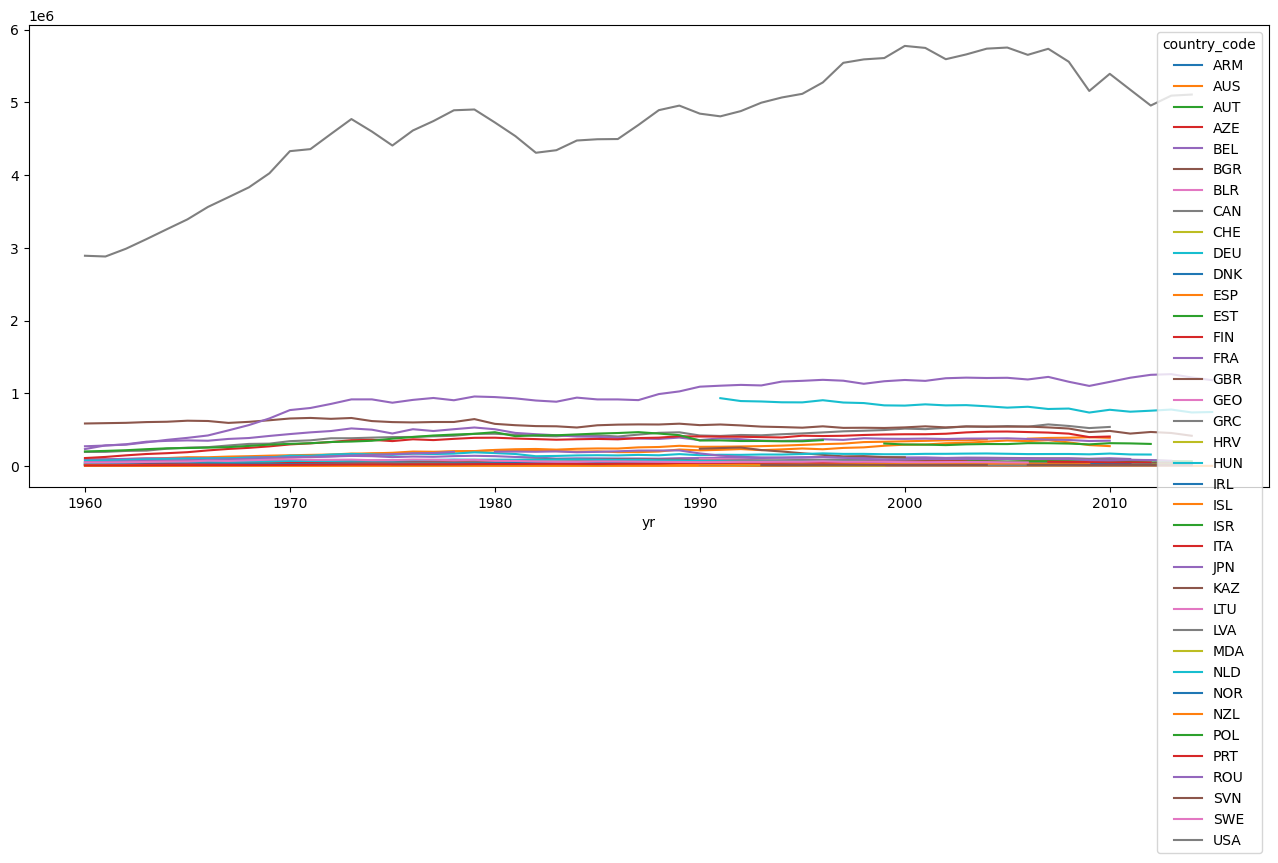

In [52]:
CO2Plot = co2_pivot.plot(figsize = (16,6))
# Import the style from Matplotlib.
from matplotlib import style


In [53]:
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
CO2Plot.set_title ("Total Fare by City Type")
CO2Plot.set_xlabel( "Year")
CO2Plot.set_ylabel ("CO2 Number")
plt.tight_layout()


<Figure size 640x480 with 0 Axes>

In [34]:

style.use('fivethirtyeight')
CO2Plot.set_title ("CO2 Emmisions")
CO2Plot.set_xlabel( "Date")
CO2Plot.set_ylabel ("CO2 Emmisions")
plt.tight_layout()
#Save chart

AttributeError: 'Series' object has no attribute 'set_title'